# Image segmentation with StarDist

StarDist is a deep-learning based image segmentation method for segmenting objects such as cell nuclei. It comes with pretrained models we demonstrate in this notebook. It is meant to be executed in Google Colab.

See also
* [StarDist in Proceedings of MICCAI 2018](https://link.springer.com/chapter/10.1007/978-3-030-00934-2_30)
* [StarDist on github](https://github.com/stardist/stardist)
* [StarDist NEUBIAS Academy webinar](https://www.youtube.com/watch?v=Amn_eHRGX5M)
* [StarDist prediction example](https://github.com/stardist/stardist/blob/master/examples/2D/3_prediction.ipynb)
* [GPU-accelerated image processing in the cloud using Google Colab and clEsperanto](https://biapol.github.io/blog/robert_haase/clesperanto_google_colab/readme.html)

We start by installing necessary Python libraries.

In [ ]:
!pip install stardist stackview ipycanvas==0.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from stardist.models import StarDist2D
from csbdeep.utils import normalize
from stardist import random_label_cmap

import stackview
import matplotlib.pyplot as plt
import numpy as np
from skimage.data import human_mitosis
from skimage.io import imsave

We will process the human mitosis example dataset of scikit-image, provided by Jason Moffat [1] through CellProfiler.

[1]
Moffat J, Grueneberg DA, Yang X, Kim SY, Kloepfer AM, Hinkle G, Piqani B, Eisenhaure TM, Luo B, Grenier JK, Carpenter AE, Foo SY, Stewart SA, Stockwell BR, Hacohen N, Hahn WC, Lander ES, Sabatini DM, Root DE (2006) “A lentiviral RNAi library for human and mouse genes applied to an arrayed viral high-content screen” Cell, 124(6):1283-98. PMID: 16564017 DOI:10.1016/j.cell.2006.01.040.

StackViewNDArray([[ 8,  8,  8, ..., 63, 78, 75],
                  [ 8,  8,  7, ..., 67, 71, 71],
                  [ 9,  8,  8, ..., 53, 64, 66],
                  ...,
                  [ 8,  9,  8, ..., 17, 24, 59],
                  [ 8,  8,  8, ..., 17, 22, 55],
                  [ 8,  8,  8, ..., 16, 18, 38]], dtype=uint8)
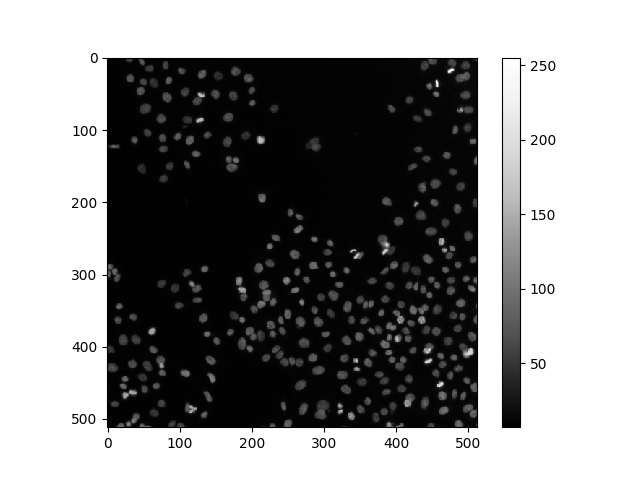
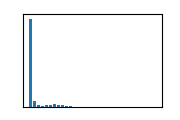

In [ ]:
image = human_mitosis()
stackview.insight(image)

## Loading a model
Models are files that typically contain a neural network which is capable of segmenting an image. StarDist comes with some pretrained models for demonstrating how the algorithm performs on a general use-case such as nuclei segmentation. If such a pretrained model does not perform well on your data (be a good scientist and check that carefully!), you need to [train your own model](https://github.com/stardist/stardist/blob/master/examples/2D/2_training.ipynb) which fits to your data. For training, you will likely need a powerful GPU, for applying a model (prediction step) to a 2D image no GPU is necessary.

In [ ]:
# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


## Normalizing the input image
Many algorithms using neural networks need normalized input data to work on. For example, you can determine the 1% and the 99.8% percentile (that's very commond) and normalize your image so that the intensities spread between these percentiles are afterwards in the range between 0 and 1. We need to do this because the model was trained on an image in this range and might not be able to segment images with different intensity ranges.

In [ ]:
axis_norm = (0,1)
image = normalize(image, 1,99.8, axis=axis_norm)

Segmenting the image and labeling the individual objects is often called "instance segmentation" or "prediction" in the artificial intelligence community.

1/1 [==============================] - 1s 950ms/step


StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=int32)
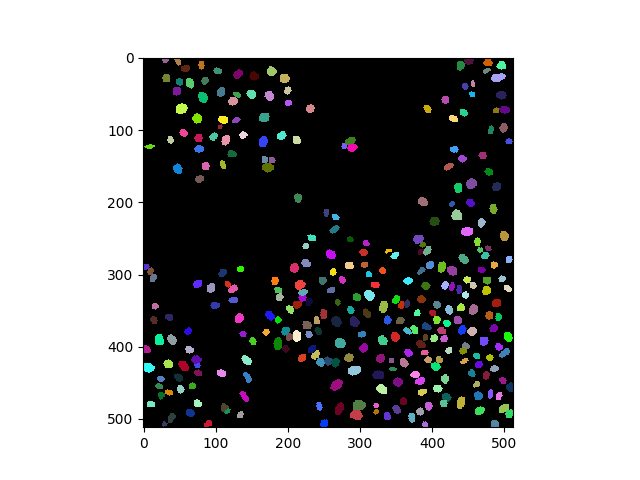

In [ ]:
labels, details = model.predict_instances(image)

stackview.insight(labels)

## Result visualization
Cell / nuclei segmentation results can be checked best if the resulting label image is overlaid to the original image

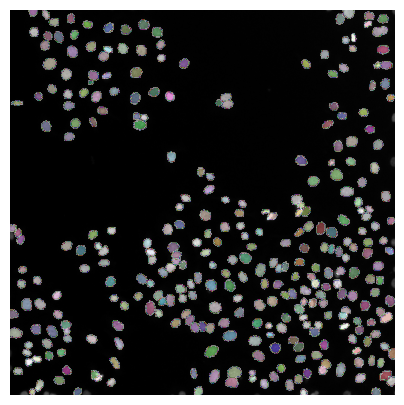

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(image, clim=(0,1), cmap='gray')
plt.imshow(labels, cmap=random_label_cmap(), alpha=0.5)
plt.axis('off');

... or by drawing outlines around segmented regions.

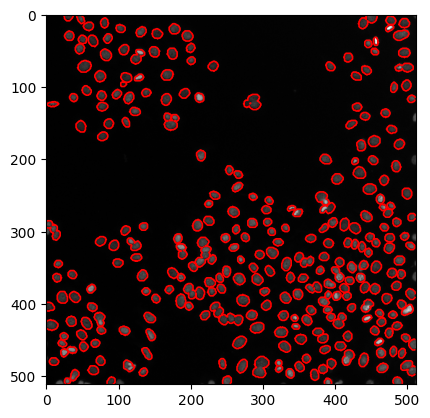

In [ ]:
# create a new plot
fig, axes = plt.subplots(1,1)

# add two images
axes.imshow(image, cmap=plt.cm.gray)
axes.contour(labels, [0.5], linewidths=1.2, colors='r')

## Saving results to Google Drive
We now connect with Goolge Drive and can save the result there to download it.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
imsave('/content/gdrive/My Drive/human_mitosis_labels_stardist.tif', labels)

<ipython-input-10-6d7b18043acd> (1): /content/gdrive/My Drive/human_mitosis_labels_stardist.tif is a low contrast image


Note: The model we applied here to blobs.gif was not trained on it. The result doesn't look so bad though.

## More available pretrained models

StarDist offers more available pretrained models.

In [ ]:
StarDist2D.from_pretrained()

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


## Exercise
Annotate some nuclei in the `human_mitosis` dataset, e.g. using Napari. Afterwards, use these spare annotions to measure the quality of the `labels` image that has been stored to your Google Drive above.